Gayatri Godbole <br>
TE1 <br>
31128 <br>

## Dataset: melb_data.csv
https://www.kaggle.com/anthonypino/melbourne-housing-market
This data was scraped from publicly available results posted every week from Domain.com.au.The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

## 1. Import necessary libraries

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

## 2. Load dataset into pandas dataframe

In [119]:
df = pd.read_csv("melb_data.csv")  #reading csv file

## 3. Data preprocessing

In [120]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [121]:
df.head() #return first 5 rows

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [122]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [123]:
df.shape #get no of (rows,columns)

(13580, 21)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [125]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


## 4. Convert from one type to another

In [126]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [127]:
df.dtypes.value_counts() #count the variables with each data type

float64    12
object      8
int64       1
dtype: int64

In [128]:
df['Price'] = df['Price'].apply(np.int64)
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price              int64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

## 5. Missing values

In [129]:
df.isnull().sum() #prints the number of missing values in every column

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

<AxesSubplot:>

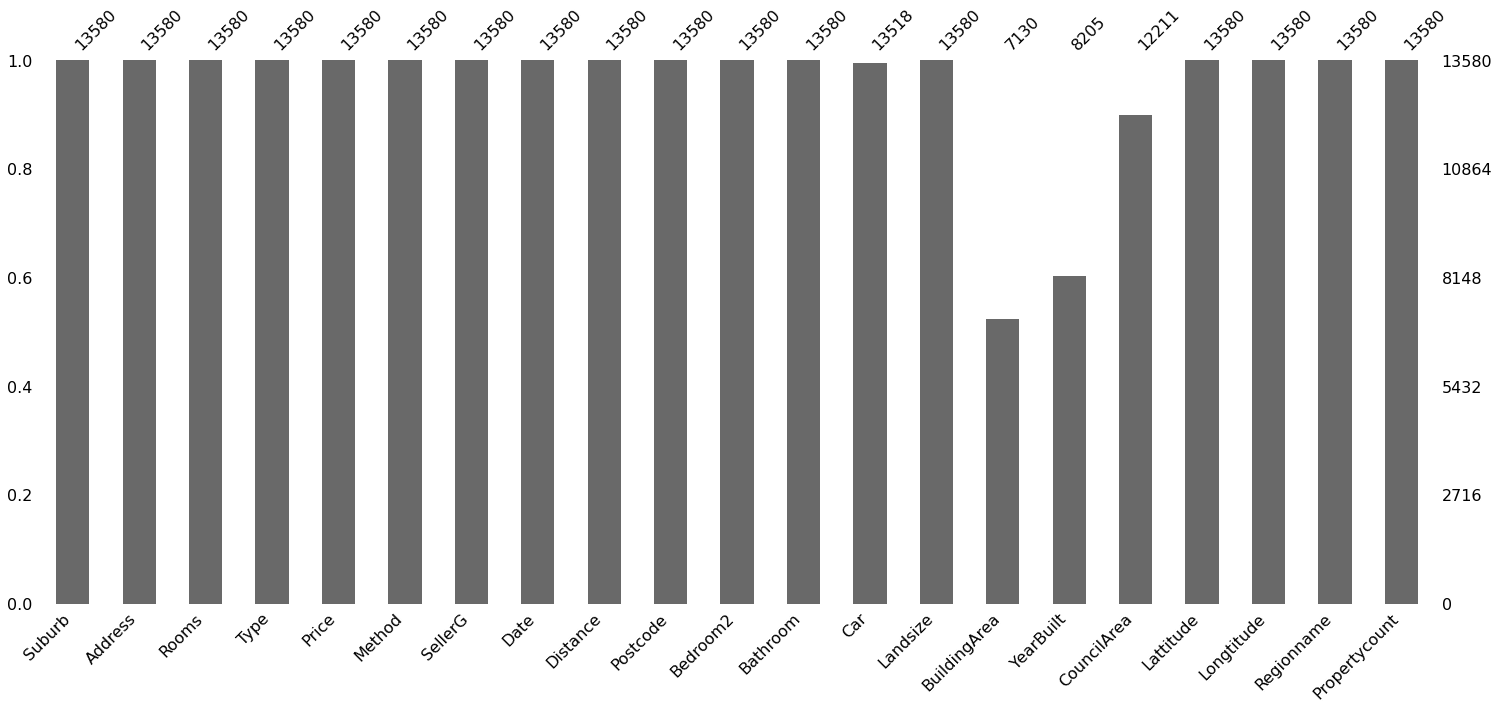

In [130]:
msno.bar(df) #to plot how many missing values present

Filling in missing values- <br>
1. With 0 <br>
2. By previous value (row wise) 'pad'<br> 
3. By next value (row wise)'bfill'<br>
4. By previous value (col wise) 'pad' axis=1 <br>
5. By next value (col wise) 'bfill' axis=1<br>
6. Fill every column's NULL value with a different value <br>
7. By mean of every column <br>
8. By max, min of column <br>

replace(),interpolate() <br>

Drop null values row wise by dropna()

In [131]:
#by mean of every column
df.fillna(df.mean(), inplace=True) #for numeric values

In [132]:
df["CouncilArea"].fillna("Not given", inplace=True) #since it is a string

In [133]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,151.96765,1964.684217,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00000,1900.000000,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00000,1900.000000,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,151.96765,1964.684217,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00000,2014.000000,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,151.96765,1981.000000,Not given,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.00000,1995.000000,Not given,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,151.96765,1997.000000,Not given,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.00000,1920.000000,Not given,-37.85908,144.89299,Western Metropolitan,6380.0


## 6. Categorical to numeric - One hot encoding
Each unique value in a column, a new column is created. <br> One-hot encoding turns your categorical data into a binary vector representation

To check for categorical variable - 
identify columns with datatype as str / object
apply .unique on them, if you get <=10 values then its categorical

In [134]:
df['Type'].unique()

array(['h', 'u', 't'], dtype=object)

In [135]:
df['Method'].unique()

array(['S', 'SP', 'PI', 'VB', 'SA'], dtype=object)

so we see that: type,method are categorical variables, convert it into numeric

Using the Pandas get_dummies() returns a dataframe with the column passed in returned as dummy variables.

In [136]:
type_hot = pd.get_dummies(df['Type']).add_prefix('Type'+' - ')
type_hot

,Type - h,Type - t,Type - u
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
13575,1,0,0
13576,1,0,0
13577,1,0,0
13578,1,0,0


In [137]:
df = df.drop('Type',axis = 1) #drop the type column from original df
df = df.join(type_hot) #join category wise type columns to original df
df

,Suburb,Address,Rooms,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Type - h,Type - t,Type - u
0,Abbotsford,85 Turner St,2,1480000,S,Biggin,3/12/2016,2.5,3067.0,2.0,...,151.96765,1964.684217,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,1,0,0
1,Abbotsford,25 Bloomburg St,2,1035000,S,Biggin,4/02/2016,2.5,3067.0,2.0,...,79.00000,1900.000000,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,1,0,0
2,Abbotsford,5 Charles St,3,1465000,SP,Biggin,4/03/2017,2.5,3067.0,3.0,...,150.00000,1900.000000,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,1,0,0
3,Abbotsford,40 Federation La,3,850000,PI,Biggin,4/03/2017,2.5,3067.0,3.0,...,151.96765,1964.684217,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0,1,0,0
4,Abbotsford,55a Park St,4,1600000,VB,Nelson,4/06/2016,2.5,3067.0,3.0,...,142.00000,2014.000000,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,1245000,S,Barry,26/08/2017,16.7,3150.0,4.0,...,151.96765,1981.000000,Not given,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,1,0,0
13576,Williamstown,77 Merrett Dr,3,1031000,SP,Williams,26/08/2017,6.8,3016.0,3.0,...,133.00000,1995.000000,Not given,-37.85927,144.87904,Western Metropolitan,6380.0,1,0,0
13577,Williamstown,83 Power St,3,1170000,S,Raine,26/08/2017,6.8,3016.0,3.0,...,151.96765,1997.000000,Not given,-37.85274,144.88738,Western Metropolitan,6380.0,1,0,0
13578,Williamstown,96 Verdon St,4,2500000,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,...,157.00000,1920.000000,Not given,-37.85908,144.89299,Western Metropolitan,6380.0,1,0,0


In [138]:
method_hot = pd.get_dummies(df['Method']).add_prefix('Method'+' - ')
df = df.drop('Method',axis = 1)
df = df.join(method_hot)
df  

,Suburb,Address,Rooms,Price,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,...,Regionname,Propertycount,Type - h,Type - t,Type - u,Method - PI,Method - S,Method - SA,Method - SP,Method - VB
0,Abbotsford,85 Turner St,2,1480000,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,...,Northern Metropolitan,4019.0,1,0,0,0,1,0,0,0
1,Abbotsford,25 Bloomburg St,2,1035000,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,...,Northern Metropolitan,4019.0,1,0,0,0,1,0,0,0
2,Abbotsford,5 Charles St,3,1465000,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,...,Northern Metropolitan,4019.0,1,0,0,0,0,0,1,0
3,Abbotsford,40 Federation La,3,850000,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,...,Northern Metropolitan,4019.0,1,0,0,1,0,0,0,0
4,Abbotsford,55a Park St,4,1600000,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,...,Northern Metropolitan,4019.0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,1245000,Barry,26/08/2017,16.7,3150.0,4.0,2.0,...,South-Eastern Metropolitan,7392.0,1,0,0,0,1,0,0,0
13576,Williamstown,77 Merrett Dr,3,1031000,Williams,26/08/2017,6.8,3016.0,3.0,2.0,...,Western Metropolitan,6380.0,1,0,0,0,0,0,1,0
13577,Williamstown,83 Power St,3,1170000,Raine,26/08/2017,6.8,3016.0,3.0,2.0,...,Western Metropolitan,6380.0,1,0,0,0,1,0,0,0
13578,Williamstown,96 Verdon St,4,2500000,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,...,Western Metropolitan,6380.0,1,0,0,1,0,0,0,0
